# Python 與機器學習（4）

## 郭耀仁

## 羅吉斯回歸

- 感知器（Perceptron）學習的效率不夠高
- 實務更常用的分類器（Classifier）是羅吉斯回歸（Logistic Regression）
- 雖然有**回歸**兩個字，但其實是個分類器

## 羅吉斯回歸（2）

![Logistic Regression](https://storage.googleapis.com/py_ml_images/logistic_regression.png)

## 羅吉斯回歸（3）

- **Sigmoid** 函數或者稱為 **Logistic** 函數

$$\phi(z) = \frac{1}{1+e^{-z}}$$

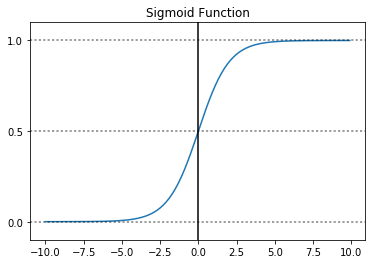

In [1]:
# 羅吉斯回歸（4）
import matplotlib.pyplot as plt
import numpy as np

def sigmoid_fun(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid_fun(x)
plt.plot(x, y)
plt.axvline(0, color = 'black')
plt.axhline(y = 0, ls='dotted', color = 'black', alpha = 0.5)
plt.axhline(y = 0.5, ls = 'dotted', color = 'black', alpha = 0.5)
plt.axhline(y = 1, ls='dotted', color = 'black', alpha = 0.5)
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.title("Sigmoid Function")
plt.show()

## 羅吉斯回歸（5）

- Quantizer：

$$ \hat{y} =
  \begin{cases}
    1       & \quad \text{if } \phi(z)\geq 0.5\\
    0  & \quad \text{otherwise}\\
  \end{cases}
$$

## 羅吉斯回歸（6）

- 成本函數：

$$J(\phi(z), y) =
  \begin{cases}
    -\log(\phi(z))  & \quad \text{if } y = 1\\
    -\log(1 - \phi(z))  & \quad \text{if } y = 0\\
  \end{cases}
$$

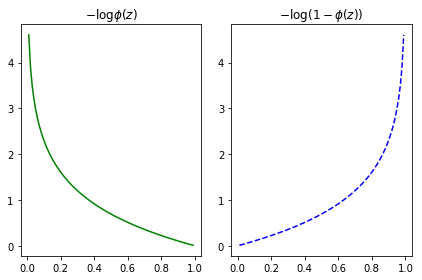

In [2]:
# 羅吉斯回歸（7）
# 繪製成本函數
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 1, 0.01)
y1 = -np.log(x)
y2 = -np.log(1 - x)
plt.subplot(1, 2, 1)
plt.plot(x, y1, "g")
plt.title("$-\log{\phi(z)}$")
plt.subplot(1, 2, 2)
plt.plot(x, y2, "b--")
plt.title("$-\log{(1-\phi(z))}$")
plt.tight_layout()
plt.show()

## 羅吉斯回歸（8）

- 不用自己寫
- 透過 `from sklearn.linear_model import LogisticRegression` 獲得

In [3]:
# 羅吉斯回歸（9）
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # 花瓣長度與花瓣寬度
y = iris.target
ss = StandardScaler()
ss.fit(X)
X_std = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 0)
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

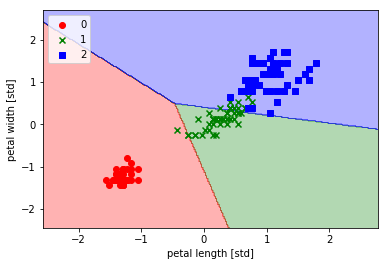

In [4]:
# 羅吉斯回歸（10）
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('o', 'x', 's') # 有三個類別
    colors = ('red', 'green', 'blue') # 有三個類別
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)

plot_decision_boundary(X = X_std, y = y, classifier = lr) # 換分類器
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

In [5]:
# 羅吉斯回歸（11）

np.set_printoptions(precision = 4, suppress = True) # 調整一下印出格式
# 印出前五個測試資料觀測值的預測機率與分類結果
for i in range(5):
    print(lr.predict_proba(X_test[i, :].reshape(1, 2)))
    print(lr.predict(X_test[i, :].reshape(1, 2)))
    print("===")

np.set_printoptions() # 恢復印出格式預設值

[[ 0.0017  0.1792  0.8191]]
[2]
===
[[ 0.2554  0.6221  0.1225]]
[1]
===
[[ 0.7973  0.2022  0.0005]]
[0]
===
[[ 0.0014  0.3637  0.6349]]
[2]
===
[[ 0.7891  0.2103  0.0006]]
[0]
===


In [6]:
# 羅吉斯回歸（12）
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.80
